In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

/Users/dtyu/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
filename = "/Users/dtyu/NSLS-II-Data/Thursday/10/21/results/fv_y_avg.npy"
data = np.load(filename) + 1e-6
subdata = data[::10, :]
nclusters = 25
subdata.shape

(878, 1816)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=nclusters)
labels_kmeans = kmeans.fit_predict(subdata)

In [5]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=nclusters, eigen_solver='arpack', affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(subdata)

/Users/dtyu/anaconda/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:215: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [3]:
#from sklearn.cluster import DBSCAN

#dbscan = DBSCAN(eps=.2)
#labels_dbscan = dbscan.fit_predict(subdata)
#nclusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
#nclusters_dbscan

In [6]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=nclusters, linkage='ward')
labels_ward = ward.fit_predict(subdata)

In [14]:
complete = AgglomerativeClustering(n_clusters=nclusters, linkage='complete')
labels_complete = complete.fit_predict(subdata)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
new_subdata = pca.fit_transform(subdata)
new_subdata.shape

(878, 10)

In [10]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, metric=True, n_init=2, max_iter=100, n_jobs=1, random_state=42)
pos = mds.fit(new_subdata).embedding_

In [11]:
newpos_kmeans = pos[labels_kmeans!=0, :]
newlabels_kmeans = labels_kmeans[labels_kmeans!=0]
newpos_spectral = pos[labels_spectral!=0, :]
newlabels_spectral = labels_spectral[labels_spectral!=0]

<IPython.core.display.Javascript object>


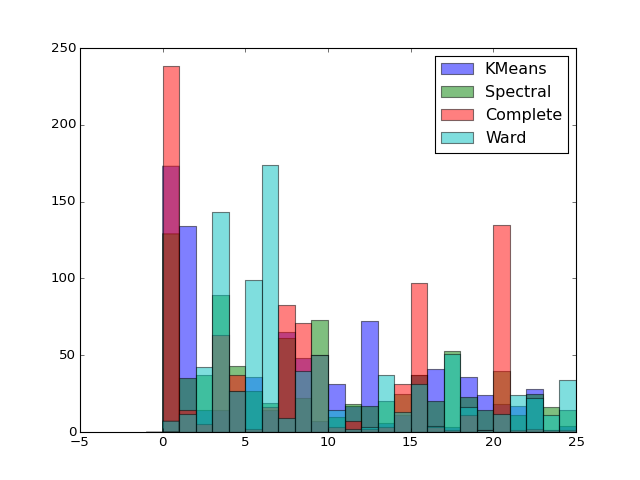

In [12]:
plt.close('all')
fig, ax = plt.subplots()
ax.hist(labels_kmeans, bins=range(nclusters+1), alpha=0.5, label='KMeans', align='mid')
ax.hist(labels_spectral, bins=range(nclusters+1), alpha=0.5, label='Spectral', align='mid')
ax.hist(labels_complete, bins=range(-1,nclusters+1), alpha=0.5, label='Complete', align='mid')
ax.hist(labels_ward, bins=range(nclusters+1), alpha=0.5, label='Ward', align='mid')
ax.legend(loc='upper right')
plt.show()

<IPython.core.display.Javascript object>


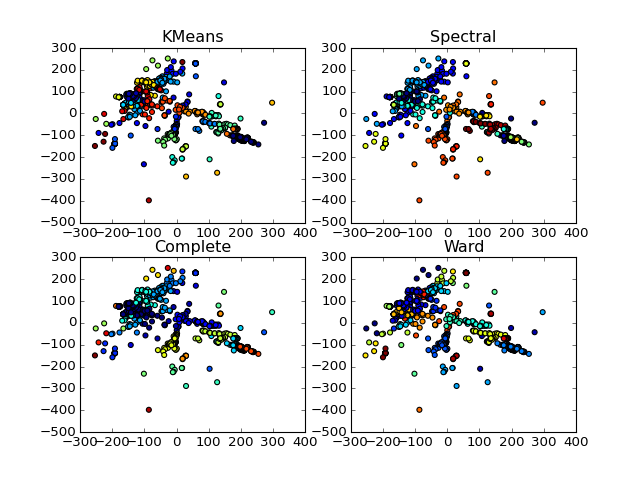

In [13]:
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.scatter(pos[:,0], pos[:,1], c=labels_kmeans)
ax1.set_title('KMeans')
ax2.scatter(pos[:,0], pos[:,1], c=labels_spectral)
ax2.set_title('Spectral')
ax3.scatter(pos[:,0], pos[:,1], c=labels_complete)
ax3.set_title('Complete')
ax4.scatter(pos[:,0], pos[:,1], c=labels_ward)
ax4.set_title('Ward')
plt.show()